In [1]:
import pandas as pd # For dataframes (tables)
import numpy as np # For numerical operations

import math
import matplotlib.pyplot as plt # For plots
import os # To import external python files
import sys# To import external python files

import pandas as pd # For dataframes (tables)
import numpy as np # For arange
import matplotlib.pyplot as plt # For plots
import pickle # to serialize/deserialize objects
import math # for sqrt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression

from tensorflow.keras.models import Sequential, load_model
from functools import partial

from statistics import mean
## Download the code I prepared for you
!wget https://raw.githubusercontent.com/andreaaraldo/machine-learning-for-networks/master/course_library/andrea_models.py
!wget https://raw.githubusercontent.com/andreaaraldo/machine-learning-for-networks/master/course_library/feature_engineering.py

from andrea_models import AndreaLinearRegression # In the course library

! wget https://raw.githubusercontent.com/andreaaraldo/machine-learning-for-networks/master/course_library/visualization.py
import visualization

!pip install category_encoders
import category_encoders as ce



import pickle # To save the model
from functools import partial
import random



# The following is to be able to mount Google Drive
from google.colab import drive


# We import a function I prepared for you in the course library
! wget https://raw.githubusercontent.com/andreaaraldo/machine-learning-for-networks/master/course_library/visualization.py
from visualization import plot_conf_mat


from typing import List

import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.utils import plot_model
from tensorflow.keras.callbacks import ModelCheckpoint, CSVLogger


# The following library is to plot the loss during training
# https://github.com/stared/livelossplot
! pip install livelossplot
from livelossplot import PlotLossesKerasTF


import os
from os.path import isfile
##
from pandas.plotting import scatter_matrix
from scipy.io.arff import loadarff
from google.colab import drive
import glob

#dfArffDataA1 = []
#dfArffDataA2 = []
#dfArffDataB = []
dfArffDataAll = []

mount_point = '/content/drive' # Always the same, don't change it
drive.mount(mount_point)
drive_path = mount_point + '/My Drive/' # Always the same, don't change it

# Replace the following folder with some folder inside your google drive
my_path = drive_path + \
  'CSN/ML_for_network/'

--2023-11-09 09:50:03--  https://raw.githubusercontent.com/andreaaraldo/machine-learning-for-networks/master/course_library/andrea_models.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3190 (3.1K) [text/plain]
Saving to: ‘andrea_models.py’

andrea_models.py    100%[===================>]   3.12K  --.-KB/s    in 0s      

2023-11-09 09:50:03 (47.9 MB/s) - ‘andrea_models.py’ saved [3190/3190]

--2023-11-09 09:50:03--  https://raw.githubusercontent.com/andreaaraldo/machine-learning-for-networks/master/course_library/feature_engineering.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected

# **Load Data**

## **A1**

In [2]:
## Add A1 Data
dfArffDataAll = []
sPath = '/content/drive/MyDrive/CSN/ML_for_network/Scenario_A1/'
StrArffFile = os.listdir(sPath)

i = 0
dfArffDataAll = pd.DataFrame()
while i < len(StrArffFile):
  str = sPath + StrArffFile[i]
  print(str)
  data = loadarff(str)
  df = pd.DataFrame(data[0])
  dfArffDataAll = dfArffDataAll.append(df,ignore_index=True)

  i = i + 1
dfArffDataAll.head(n = 1000)

#df.info(verbose=True)
#df.shape


/content/drive/MyDrive/CSN/ML_for_network/Scenario_A1/TimeBasedFeatures-Dataset-15s-VPN.arff


<ipython-input-2-bac1aa9b98ec>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfArffDataAll = dfArffDataAll.append(df,ignore_index=True)


/content/drive/MyDrive/CSN/ML_for_network/Scenario_A1/TimeBasedFeatures-Dataset-30s-VPN.arff


<ipython-input-2-bac1aa9b98ec>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfArffDataAll = dfArffDataAll.append(df,ignore_index=True)


/content/drive/MyDrive/CSN/ML_for_network/Scenario_A1/TimeBasedFeatures-Dataset-120s-VPN.arff


<ipython-input-2-bac1aa9b98ec>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfArffDataAll = dfArffDataAll.append(df,ignore_index=True)


/content/drive/MyDrive/CSN/ML_for_network/Scenario_A1/TimeBasedFeatures-Dataset-60s-VPN.arff


<ipython-input-2-bac1aa9b98ec>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfArffDataAll = dfArffDataAll.append(df,ignore_index=True)


,duration,total_fiat,total_biat,min_fiat,min_biat,max_fiat,max_biat,mean_fiat,mean_biat,flowPktsPerSecond,...,mean_active,max_active,std_active,min_idle,mean_idle,max_idle,std_idle,class1,std_fiat,std_biat
0,9368711.0,16.0,4.0,1564818.0,1549373.0,190205.285714,203290.456522,389822.391917,370323.719754,10.353612,...,1.983656e+06,2195089.0,1.832197e+05,1234883.0,1420565.0,1523088.0,161096.539275,b'Non-VPN',NaN,NaN
1,7340238.0,18.0,4.0,1567554.0,1527893.0,165686.977273,186914.846154,317267.548742,304370.651301,11.580006,...,3.572433e+06,5653239.0,2.942704e+06,1131498.0,1324636.0,1517774.0,273138.379008,b'Non-VPN',NaN,NaN
2,4644225.0,29.0,15.0,1270547.0,1079974.0,165865.178571,195302.130435,329473.126261,300492.588227,11.412022,...,1.758922e+06,1758922.0,0.000000e+00,1079974.0,1079974.0,1079974.0,0.000000,b'Non-VPN',NaN,NaN
3,4978735.0,19.0,8.0,2492050.0,2457286.0,239543.250000,276596.388889,612435.304238,628339.573544,8.034169,...,2.382905e+06,3054885.0,9.503232e+05,1346073.0,1894031.5,2441990.0,774930.342317,b'Non-VPN',NaN,NaN
4,11838189.0,19.0,10.0,3094089.0,3093543.0,243766.500000,295954.725000,599721.781709,625632.703972,7.602514,...,2.400446e+06,3240696.0,6.232744e+05,1394455.0,1983227.0,3042717.0,725987.829075,b'Non-VPN',NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,-1.0,-1.0,-1.0,-1.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,-1.0,0.000000e+00,-1.0,0.0,-1.0,0.000000,b'Non-VPN',NaN,NaN
996,0.0,-1.0,-1.0,-1.0,-1.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,-1.0,0.000000e+00,-1.0,0.0,-1.0,0.000000,b'Non-VPN',NaN,NaN
997,0.0,-1.0,-1.0,-1.0,-1.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,-1.0,0.000000e+00,-1.0,0.0,-1.0,0.000000,b'Non-VPN',NaN,NaN
998,0.0,-1.0,-1.0,-1.0,-1.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,-1.0,0.000000e+00,-1.0,0.0,-1.0,0.000000,b'Non-VPN',NaN,NaN


In [3]:
dfArffDataAll.shape

(59706, 26)

In [ ]:
dfArffDataAll.describe()

## **A2**

In [ ]:
## Add A2 Data
#dfArffDataAll = pd.DataFrame()
sPath = '/content/drive/MyDrive/CSN/ML_for_network/Scenario_A2/'
StrArffFile = os.listdir(sPath)
i = 0
while i < len(StrArffFile):
  StrArffFile[i] = sPath + StrArffFile[i]
  i = i + 1

i = 0
dfArffDataA2 = pd.DataFrame()
while i < len(StrArffFile):
  str = StrArffFile[i]
  print(str)
  data = loadarff(str)
  df = pd.DataFrame(data[0])
  dfArffDataAll = dfArffDataAll.append(df,ignore_index=True)

  i = i + 1

df.head(n = 5)
#df.info(verbose=True)

## **B**

In [ ]:
## Add B Data
sPath = '/content/drive/MyDrive/CSN/ML_for_network/Scenario_B/'
StrArffFile = os.listdir(sPath)
i = 0
while i < len(StrArffFile):
  #if 'TimeBasedFeatures-Dataset-60s.arff' == StrArffFile[i] or "TimeBasedFeatures-Dataset-60s-AllinOne.arff" == StrArffFile[i]:
  #  StrArffFile.pop(i)
  #  continue
  StrArffFile[i] = sPath + StrArffFile[i]
  i = i + 1

i = 0
while i < len(StrArffFile):
  str = StrArffFile[i]
  print(str)
  data = loadarff(str)
  df = pd.DataFrame(data[0])
  dfArffDataAll = dfArffDataAll.append(df,ignore_index=True)

  i = i + 1

#df.head(n = 5)
#df.info(verbose=True)

# **Pre-processing**

## **Transform data to be usable**

In [3]:
#remove nan
dfArffDataAll = dfArffDataAll.fillna(0)
#transfer byte arrays to string class
ser = pd.Series(dfArffDataAll['class1']).str.decode('ascii')
dfArffDataAll['class1'] = pd.DataFrame(ser)
#print current class type
dfArffDataAll.columns[dfArffDataAll.isnull().any()].tolist()
class1 =dfArffDataAll['class1'].unique()
print ("Values of class: ",  class1 )


Values of class:  ['Non-VPN' 'VPN']


In [5]:
#Transform from -1 to zerod
from collections import Counter
handleFeatures = []
def printMinus1Feature(dfArffDataAll,handleFeatures):
  for column in dfArffDataAll.columns.values:
    c = Counter(dfArffDataAll[column])
    #isSmallerMinus1 = (sorted(c.elements())[0] < -1)
    #if isSmallerMinus1:
      #print(column," has smaller than -1 value")
    print(column," has ",c[-1],"-1 values")
    if c[-1] > 0:
      handleFeatures.append(column)
    c = []

printMinus1Feature(dfArffDataAll, handleFeatures)
print("Handle Features to transform -1 to zero",handleFeatures)

for featureName in handleFeatures:
  dfArffDataAll.loc[dfArffDataAll[featureName] == -1, featureName] = 0

duration  has  0 -1 values
total_fiat  has  6445 -1 values
total_biat  has  9715 -1 values
min_fiat  has  8846 -1 values
min_biat  has  13857 -1 values
max_fiat  has  2401 -1 values
max_biat  has  4142 -1 values
mean_fiat  has  0 -1 values
mean_biat  has  0 -1 values
flowPktsPerSecond  has  0 -1 values
flowBytesPerSecond  has  0 -1 values
min_flowiat  has  2289 -1 values
max_flowiat  has  2108 -1 values
mean_flowiat  has  0 -1 values
std_flowiat  has  0 -1 values
min_active  has  32228 -1 values
mean_active  has  0 -1 values
max_active  has  32228 -1 values
std_active  has  0 -1 values
min_idle  has  32228 -1 values
mean_idle  has  0 -1 values
max_idle  has  32228 -1 values
std_idle  has  0 -1 values
class1  has  0 -1 values
std_fiat  has  0 -1 values
std_biat  has  0 -1 values
Handle Features to transform -1 to zero ['total_fiat', 'total_biat', 'min_fiat', 'min_biat', 'max_fiat', 'max_biat', 'min_flowiat', 'max_flowiat', 'min_active', 'max_active', 'min_idle', 'max_idle']


In [ ]:
printMinus1Feature(dfArffDataAll, handleFeatures)

In [56]:
c = Counter(dfArffDataAll["total_fiat"])
sorted(c.elements())[0] < 0

True

In [59]:
for column in dfArffDataAll.columns.values:
  c = Counter(dfArffDataAll[column])

  #isSmallerMinus1 = (sorted(c.elements())[0] < -1)
  #if isSmallerMinus1:
    #print(column," has smaller than -1 value")

  print(column," has ",c[-1],"-1 values")
  if c[-1] > 0
   handleFeatures.append(column);
  c = [];
#sorted(c.elements())

duration  has  0 -1 values
total_fiat  has  6445 -1 values
total_biat  has  9715 -1 values
min_fiat  has  8846 -1 values
min_biat  has  13857 -1 values
max_fiat  has  2401 -1 values
max_biat  has  4142 -1 values
mean_fiat  has  0 -1 values
mean_biat  has  0 -1 values
flowPktsPerSecond  has  0 -1 values
flowBytesPerSecond  has  0 -1 values
min_flowiat  has  2289 -1 values
max_flowiat  has  2108 -1 values
mean_flowiat  has  0 -1 values
std_flowiat  has  0 -1 values
min_active  has  32228 -1 values
mean_active  has  0 -1 values
max_active  has  32228 -1 values
std_active  has  0 -1 values
min_idle  has  32228 -1 values
mean_idle  has  0 -1 values
max_idle  has  32228 -1 values
std_idle  has  0 -1 values
class1  has  0 -1 values
std_fiat  has  0 -1 values
std_biat  has  0 -1 values


In [25]:
dfArffDataAll.columns.values

array(['duration', 'total_fiat', 'total_biat', 'min_fiat', 'min_biat',
       'max_fiat', 'max_biat', 'mean_fiat', 'mean_biat',
       'flowPktsPerSecond', 'flowBytesPerSecond', 'min_flowiat',
       'max_flowiat', 'mean_flowiat', 'std_flowiat', 'min_active',
       'mean_active', 'max_active', 'std_active', 'min_idle', 'mean_idle',
       'max_idle', 'std_idle', 'class1', 'std_fiat', 'std_biat'],
      dtype=object)

## **Encode To {0,1} Data**

In [7]:

class1 =dfArffDataAll['class1'].unique()
print ("Values of class: ",  class1 )

encoder = ce.OneHotEncoder(cols=['class1'], use_cat_names=True)
df_encode = encoder.fit_transform(dfArffDataAll)
df_encode.head()
dfArffDataAll = df_encode
class1_str = []
for name in class1:
  class1_str.append("class1_"+ name)

print ("Values of class: ",  class1, class1_str)
print ("Values of class after encode: ",  dfArffDataAll[class1_str[0]].unique() )
'''
Label Encoder: encode to the value as 0, 1, 2, 3, ..., N
dfArffDataAll.class1
le = []
le = preprocessing.LabelEncoder()
le.fit(dfArffDataAll.class1)
dfArffDataAll.class1 = le.transform(dfArffDataAll.class1)
'''

Values of class:  ['Non-VPN' 'VPN']
Values of class:  ['Non-VPN' 'VPN'] ['class1_Non-VPN', 'class1_VPN']
Values of class after encode:  [1 0]


'\nLabel Encoder: encode to the value as 0, 1, 2, 3, ..., N\ndfArffDataAll.class1\nle = []\nle = preprocessing.LabelEncoder()\nle.fit(dfArffDataAll.class1)\ndfArffDataAll.class1 = le.transform(dfArffDataAll.class1)\n'

In [ ]:
dfArffDataAll.head(1000)


Convert label to integer
> 縮排段落



In [ ]:
visualization.plot_corr(dfArffDataAll, width=15, height=15,
                        print_value=False)

Pre

In [ ]:
dfArffDataAll.head()

Samples total_biat per class :  Counter({0.0: 16809, -1.0: 9715, 2.0: 2022, 1.0: 1348, 3.0: 981, 4.0: 598, 5.0: 590, 6.0: 526, 19.0: 457, 26.0: 456, 7.0: 440, 9.0: 435, 8.0: 431, 13.0: 430, 18.0: 420, 15.0: 403, 25.0: 394, 12.0: 391, 20.0: 386, 17.0: 384, 27.0: 358, 10.0: 355, 24.0: 339, 14.0: 304, 11.0: 302, 16.0: 279, 23.0: 225, 22.0: 224, 21.0: 218, 29.0: 216, 28.0: 214, 35.0: 210, 34.0: 200, 30.0: 195, 31.0: 195, 33.0: 177, 40.0: 175, 37.0: 162, 36.0: 152, 32.0: 152, 38.0: 144, 41.0: 140, 46.0: 125, 45.0: 120, 43.0: 115, 55.0: 111, 42.0: 110, 49.0: 106, 54.0: 106, 39.0: 104, 44.0: 103, 50.0: 98, 57.0: 93, 47.0: 89, 52.0: 89, 51.0: 86, 63.0: 76, 59.0: 74, 60.0: 74, 61.0: 74, 56.0: 73, 48.0: 72, 64.0: 72, 70.0: 65, 53.0: 60, 68.0: 59, 69.0: 57, 67.0: 56, 66.0: 55, 65.0: 55, 76.0: 47, 73.0: 47, 71.0: 46, 72.0: 46, 62.0: 46, 74.0: 44, 58.0: 43, 95.0: 39, 90.0: 38, 137.0: 37, 77.0: 36, 114.0: 36, 75.0: 35, 92.0: 35, 86.0: 34, 81.0: 34, 85.0: 33, 84.0: 33, 140.0: 32, 89.0: 32, 91.0: 31, 

array([[<Axes: title={'center': 'total_biat'}>]], dtype=object)

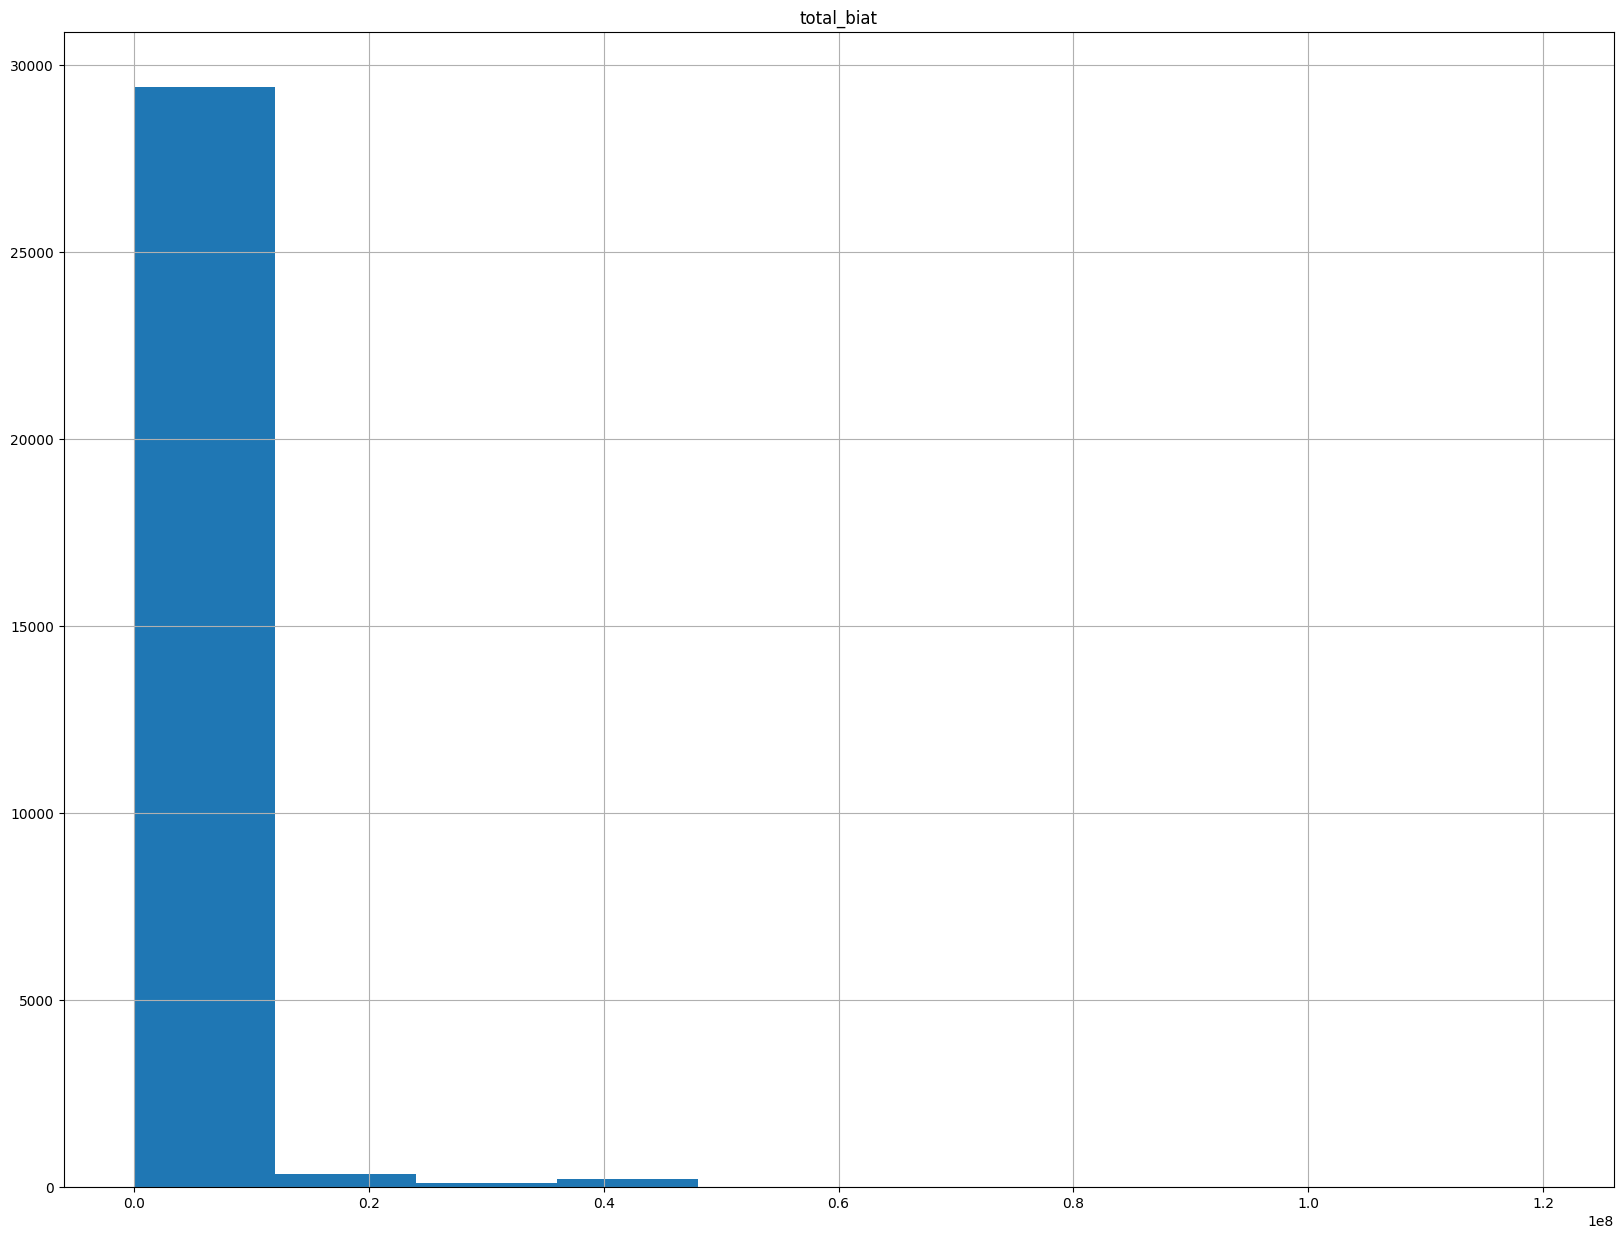

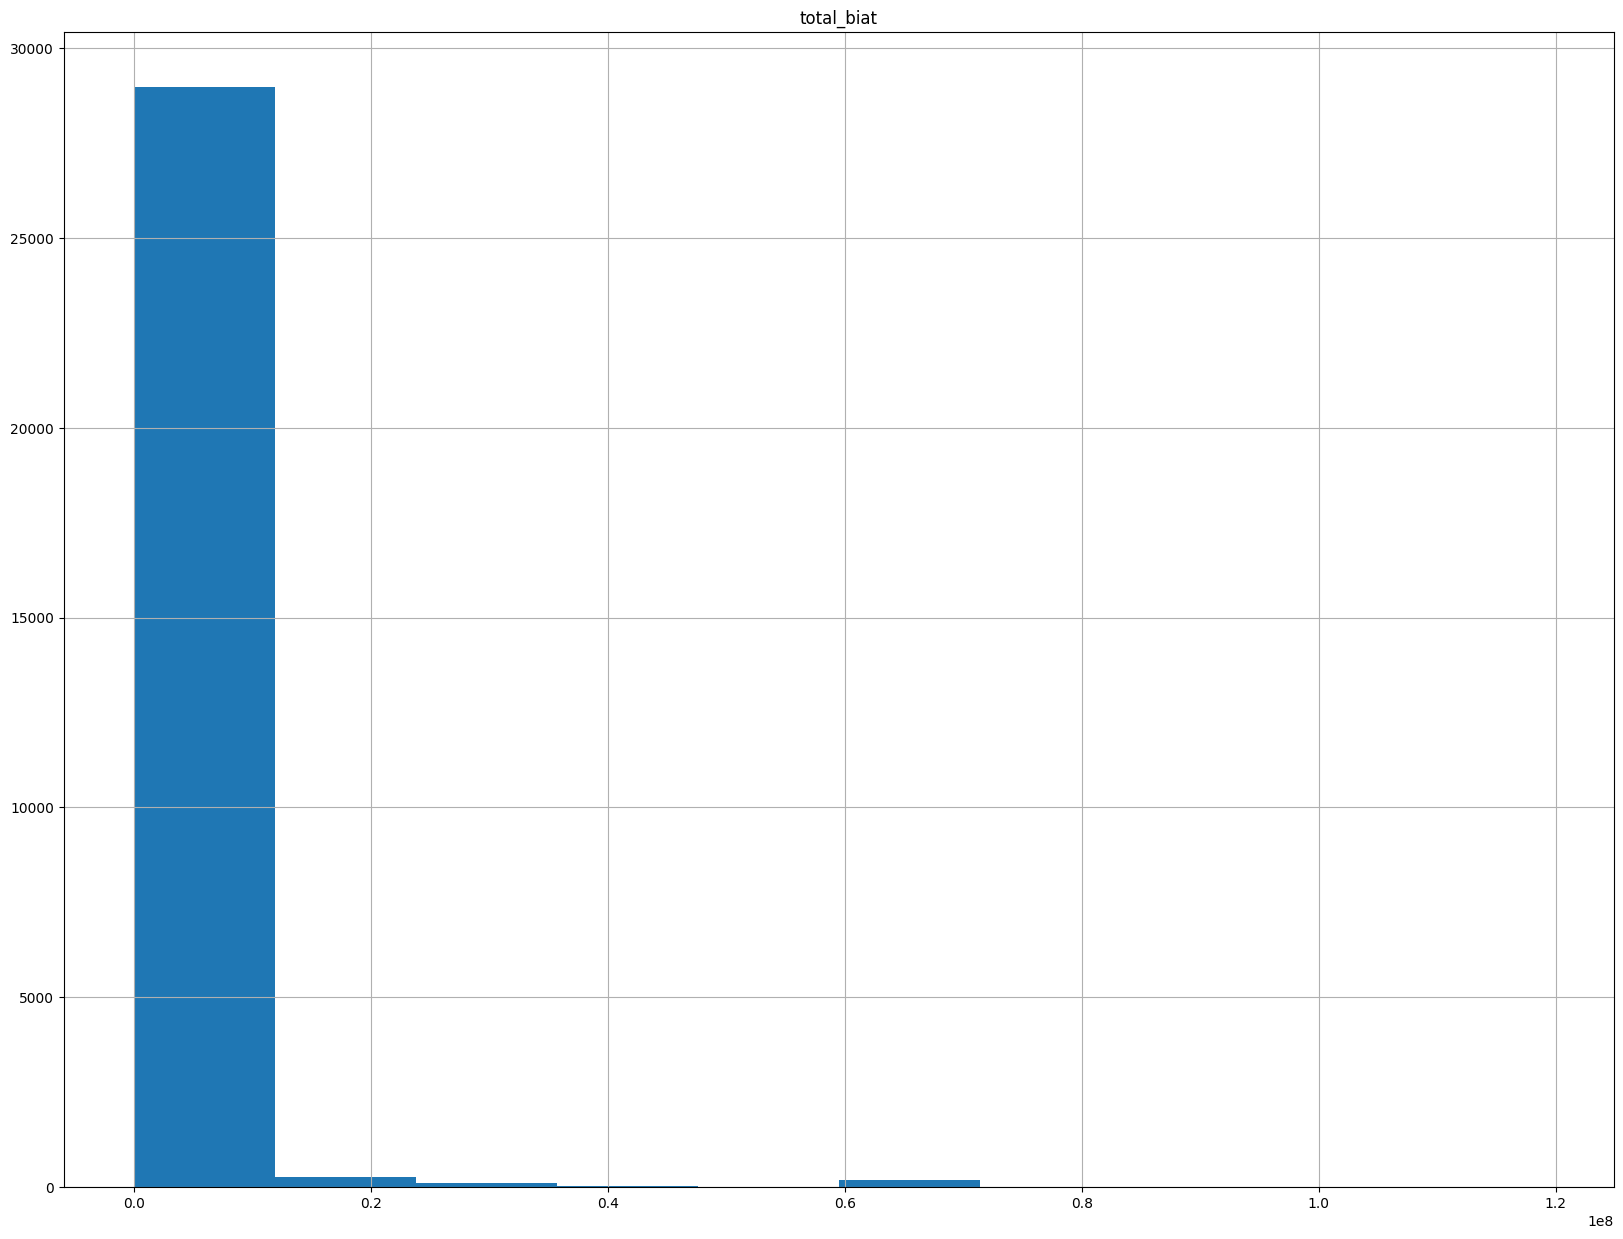

In [14]:
dfArffDataAll_VPN = dfArffDataAll[dfArffDataAll.class1_VPN == 1];
dfArffDataAll_nonVPN = dfArffDataAll[dfArffDataAll.class1_VPN == 0];
from collections import Counter
print( "Samples total_biat per class : ", Counter(dfArffDataAll.total_biat) )
print( "Samples total_fiat per class : ", Counter(dfArffDataAll.total_fiat) )
dfArffDataAll_VPN[['total_biat']].hist(figsize=(20,15))
dfArffDataAll_nonVPN[['total_biat']].hist(figsize=(20,15))
#or name in list(dfArffDataAll_VPN.columns.values):
  #dfArffDataAll_VPN.plot.hist(columns = name)

In [ ]:
scaler = StandardScaler()

X_train_scaled = scaler.transform(X_train)

In [6]:
remove_feature = ['std_fiat', 'std_biat']
for name in class1_str:
  remove_feature.append(name)

features = list(dfArffDataAll.columns.values)
print("Original Features:", features)
for name in remove_feature:
  try:
    features.remove(name)
  except:
    print('No '+ name + 'in feature list')
#features.remove(class1)
print("After Features:", features)
X = dfArffDataAll[features].values
y = dfArffDataAll[class1_str[0]].values

Original Features: ['duration', 'total_fiat', 'total_biat', 'min_fiat', 'min_biat', 'max_fiat', 'max_biat', 'mean_fiat', 'mean_biat', 'flowPktsPerSecond', 'flowBytesPerSecond', 'min_flowiat', 'max_flowiat', 'mean_flowiat', 'std_flowiat', 'min_active', 'mean_active', 'max_active', 'std_active', 'min_idle', 'mean_idle', 'max_idle', 'std_idle', 'class1_Non-VPN', 'class1_VPN', 'std_fiat', 'std_biat']
After Features: ['duration', 'total_fiat', 'total_biat', 'min_fiat', 'min_biat', 'max_fiat', 'max_biat', 'mean_fiat', 'mean_biat', 'flowPktsPerSecond', 'flowBytesPerSecond', 'min_flowiat', 'max_flowiat', 'mean_flowiat', 'std_flowiat', 'min_active', 'mean_active', 'max_active', 'std_active', 'min_idle', 'mean_idle', 'max_idle', 'std_idle', 'std_fiat', 'std_biat']


Samples per class before:  Counter({0: 21118, 1: 20676})
Samples per class after:  Counter({0: 21118, 1: 21118})


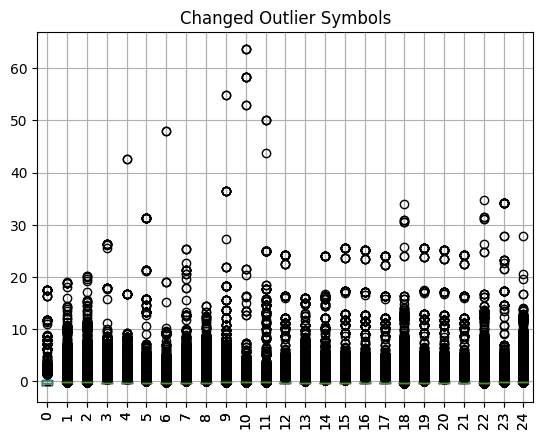

In [9]:
X_train, X_test, y_train, y_test =train_test_split(
    X,y, test_size=0.3, shuffle=True, random_state=7)

#Standarlized Data
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)

green_diamond = dict(markerfacecolor='g', marker='D')
fig1, ax1 = plt.subplots()
ax1.set_title('Changed Outlier Symbols')
ax1.boxplot(X_train_scaled, flierprops=green_diamond,showfliers=False)
pd.DataFrame(X_train_scaled, f).boxplot(rot = 90)

from collections import Counter
from imblearn.over_sampling import SMOTE
print( "Samples per class before: ", Counter(y_train) )
smote = SMOTE()
X_train, y_train = smote.fit_resample(X_train, y_train)
print( "Samples per class after: ", Counter(y_train) )



In [ ]:
dfArffDataAll.boxplot(column=features, by="class1", figsize=(10,5))


# ***Linear Regression***

In [ ]:
model = []
model = LinearRegression()
model.fit(X_train_scaled, y_train)

X_test_scaled = scaler.transform(X_test)
y_pred = model.predict(X_test_scaled)
RMSE_lin = math.sqrt(mean_squared_error(y_pred, y_test) )
RMSE_lin

0.49208138280250807

# ***lOGISTIC REGRESSION***

In [ ]:
model = LogisticRegression(C=0.3)
model.fit(X_train_scaled, y_train)
X_test_scaled = scaler.transform(X_test)
y_pred = model.predict(X_test_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


--2023-10-30 17:00:38--  https://raw.githubusercontent.com/andreaaraldo/machine-learning-for-networks/master/course_library/visualization.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13023 (13K) [text/plain]
Saving to: ‘visualization.py.10’

visualization.py.10 100%[===================>]  12.72K  --.-KB/s    in 0s      

2023-10-30 17:00:39 (75.8 MB/s) - ‘visualization.py.10’ saved [13023/13023]

Normalized confusion matrix
[[0.77537604 0.22462396]
 [0.63265078 0.36734922]]


0.5717954443948191

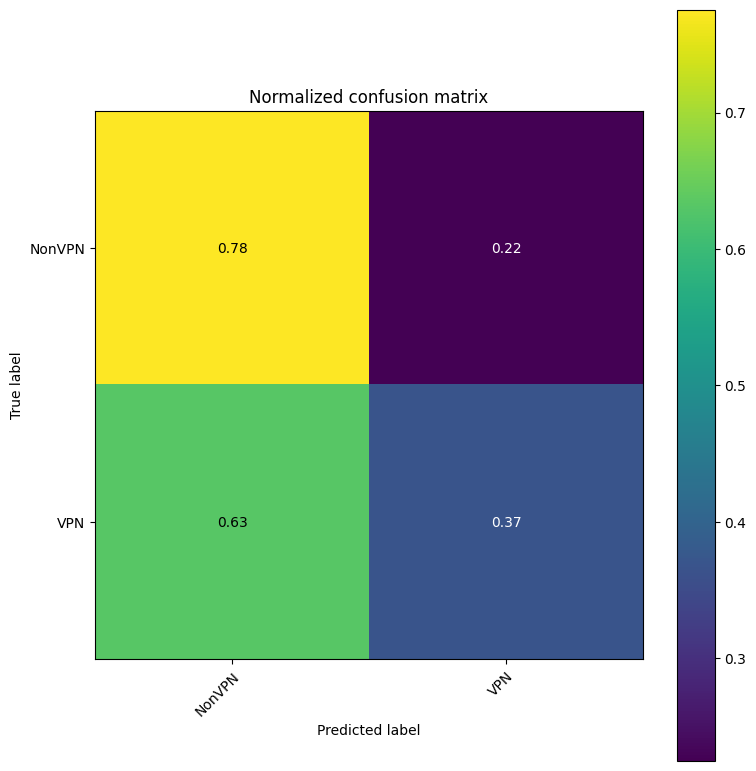

In [ ]:
# We import a function I prepared for you in the course library
! wget https://raw.githubusercontent.com/andreaaraldo/machine-learning-for-networks/master/course_library/visualization.py
from visualization import plot_conf_mat
class_name = np.array(['NonVPN', 'VPN'])
plot_conf_mat(y_test, y_pred, class_name)
accuracy_score(y_pred, y_test)

# ***Nerual Network***

In [ ]:
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)


### **Neural Netwrok Function**

In [ ]:
def make_sequential_model(sample_size, layer_sizes,
                          hidden_activation_function="relu",
                          out_activation_function="softmax",
                          loss_fun="sparse_categorical_crossentropy",
                          learning_rate=0.01,
                          regularization_coeff=0,
                          metrics=['accuracy']):
  """
  Makes a sequential model.
  Parameters
  -------------------------
  sample_size: integer
    The number of features of the samples

  layer_sizes: list
    List of the size of the neural network layers. For instance, if
    layer_sizes = [8, 6, 4], the 1st layer will have 5 neurons, the 2nd 6 etc.
    Attention: the size of the last layer (the output layer) is not arbitrary.
    In case of monodimensional regression, it must be 1.
    When using categorical_crossentropy, it must be the same as the number of
    categories.
    When using binary_crossentropy, it must be 1.

  inner_activation_function: string
    Activation function used in all layers, except the last one.
    Ex: "relu"

  out_activation_function: string
    Activation function of the last layer.
    Ex. "softmax"

  loss_fun: string
    The loss function we want to minimize. Ex. categorical_crossentropy

  learning_rate: float
    Ex. 0.01

  regularization_coeff: float
    Coefficient of ridge regression
    Ex. 0.01

  metrics: list of strings
    The metrics we want to show during training. Ex. ['accuracy']
  """

  model = Sequential()


  # In the next code we will use `partial`, which is a function of the ptyhon
  # library functools, which allows to define a class, identical to another
  # class but with some different default values.
  # In our case we define MyDenseLayer equal to the standard keras class
  # `Dense`, which implements a simple neural network layer, specifying
  # two default values: one for the activation function, and another for the
  # regularization

  if (regularization_coeff==0):
    # No regularization
    MyDenseLayer = partial(Dense, activation=hidden_activation_function)
  else:
    MyDenseLayer = partial(Dense, activation=hidden_activation_function,
                         kernel_regularizer=keras.regularizers.l2(regularization_coeff))

  # Add the input layer
  model.add( MyDenseLayer(layer_sizes[0],
                  input_dim = sample_size) )

  # Add hidden layers
  for i in range(1,len(layer_sizes)-1 ): # We iterate from the 2nd element to the penultimate
    model.add( MyDenseLayer(layer_sizes[i]) )

  # Add output layer
  model.add( Dense(layer_sizes[-1],
                  activation = out_activation_function) )


  model.compile(loss=loss_fun,
              optimizer=keras.optimizers.Adam(lr=learning_rate) ,
              metrics=metrics)

  return model


def enforce_reproducibility(seed):
  tf.keras.backend.clear_session()

  # To know more:
  #       https://machinelearningmastery.com/reproducible-results-neural-networks-keras/
  random.seed(seed)
  np.random.seed(random.randint(0,300000))
  tf.random.set_seed(random.randint(0,300000))


def train_model(model, nn_file, X_tr, y_tr, seed, max_epochs=1000,
                overwrite=True, validation_split=0.2, patience=20):
  """
  model: neural network model
            It must be a compiled neural network, e.g., a model issued by the
            function make_sequential_model(..) defined before

  nn_file:  string (name of a file)
            This file will be used to store the weights of the trained neural
            network. Such weights are automatically stored during training
            (thanks to the ModelCheckpoint callback (see the implementation
            code)), so that even if the code fails in the middle of training,
            you can resume training without starting from scratch.
            If the file already exists, before starting training, the weights
            in such a file will be loaded, so that we do not start training from
            scratch, but we start already from (hopefully) good weigths.

  overwrite: boolean
            If true, the model will be built and trained from scratch,
            indipendent of whether nn_file exists or not.

  seed: integer

  X_tr: matrix
            Feature matrix of the training set

  y_tr: matrix
            True labels of the training set

  max_epochs: integer
            Training will stop after such number of epochs

  validation_split: float (between 0 and 1)
            Fraction of training dataset that will be used as validation

  patience: integer
            Training will stop if the validation loss does not improve after the
            specified number of epochs
  """

  enforce_reproducibility(seed)


  # Before starting training, Keras divides (X_tr, y_tr) into a training subset
  # and a validation subset. During iterations, Keras will do backpropagation
  # in order to minimize the loss on the trainins subset, but it will monitor
  # and also plot the loss on the validation subset.
  # However, Keras always takes the first part of (X_tr, y_tr) as training
  # subset and the second part as validation subset. This can be bad, in case
  # the dataset has been created with a certain order (for instance all the
  # samples with a certain characteristic first, and then all the others), as
  # we instead need to train the neural network on a representative subset of
  # samples. For this reason, we first shuffle the dataset
  X_train, y_train = shuffle(X_tr, y_tr, random_state=seed)


  ##################
  #### CALLBACKS ###
  ##################
  # These functions are called at every epoch
  plot_cb = PlotLossesKerasTF()  # Plots the loss
  checkpoint_cb = ModelCheckpoint(nn_file) # Stores weights
  logger_cb = CSVLogger(nn_file+'.csv', append=True) # Stores history
                # see https://theailearner.com/2019/07/23/keras-callbacks-csvlogger/


  # To stop early if we already converged
  # See pagg 315-16 of [Ge19]
  early_stop_cb = tf.keras.callbacks.EarlyStopping(verbose=1,
      monitor='val_loss',
     patience=patience, restore_best_weights=True)


  if overwrite==True:
    try:
      os.remove(nn_file)
    except OSError:
      pass

    try:
      os.remove(nn_file+'.csv')
    except OSError:
      pass

  if isfile(nn_file):
    print("Loading pre-existing model")
    model = load_model(nn_file)

  history = model.fit(X_train, y_train, epochs=max_epochs,
                      callbacks = [plot_cb, checkpoint_cb, logger_cb, early_stop_cb],
                      validation_split=validation_split )

  return history

### **Main Function**

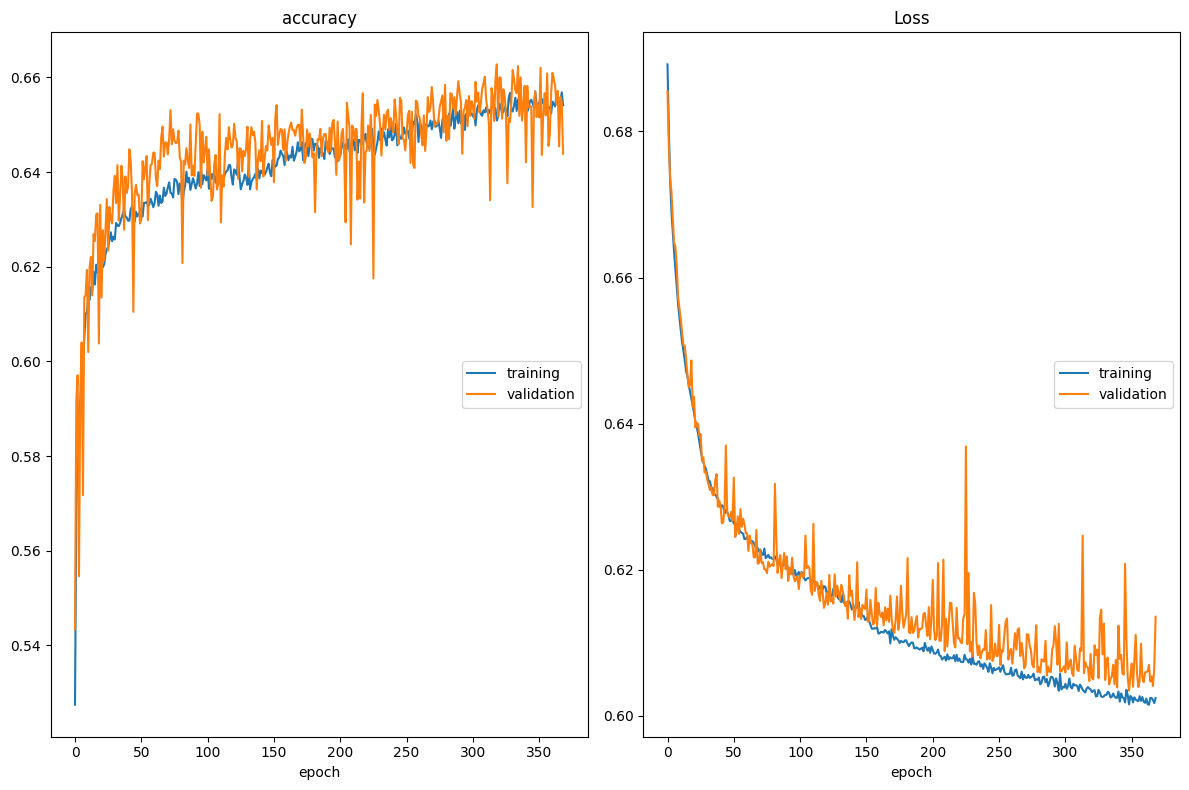

accuracy
	training         	 (min:    0.527, max:    0.657, cur:    0.654)
	validation       	 (min:    0.543, max:    0.663, cur:    0.644)
Loss
	training         	 (min:    0.602, max:    0.689, cur:    0.602)
	validation       	 (min:    0.603, max:    0.685, cur:    0.614)
Restoring model weights from the end of the best epoch: 349.
1045/1045 [==============================] - 9s 9ms/step - loss: 0.6024 - accuracy: 0.6541 - val_loss: 0.6136 - val_accuracy: 0.6439
Epoch 369: early stopping


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
nnfile = my_path + 'ml_network_NN_10_5_2.h5'

sample_size = X_train_scaled.shape[1]
num_of_classes = len(class_name)

shallow_architecture=[10, 5, num_of_classes]
model = make_sequential_model(sample_size, shallow_architecture)
history = train_model(model, nnfile, X_train_scaled, y_train, seed=3)

560/560 [==============================] - 22s 40ms/step
Normalized confusion matrix
[[0.47164345 0.52835655]
 [0.50453172 0.49546828]]
The accuracy is  0.48353059401518533


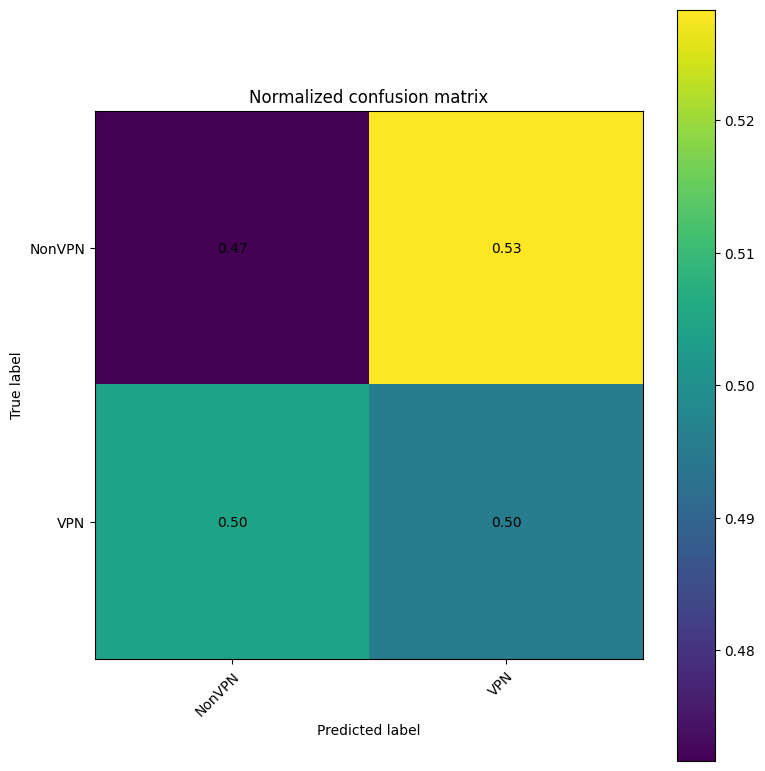

In [ ]:
y_pred_ = model.predict(X_test)
y_pred = np.argmax(y_pred_, axis=1)
class_name = np.array(['NonVPN', 'VPN'])
plot_conf_mat(y_test, y_pred, class_name)

print("The accuracy is ", accuracy_score(y_test, y_pred) )

In [ ]:
pd.DataFrame({'true':y_test, 'pred':y_pred })

In [ ]:
y_train_binary = []
for i in range(len(y_train)):
  if y_train[i] == 0:
    y_train_binary.append(1)
  else:
    y_train_binary.append(0)

y_tset_binary = []
for i in range(len(y_test)):
  if y_test[i] == 0:
    y_tset_binary.append(1)
  else:
    y_tset_binary.append(0)

In [ ]:
y_train_binary

In [ ]:
model_3 = []
model_3 = LogisticRegression(C=0.3)


model_3.fit(X_train_scaled, y_train_binary)
X_test_scaled = scaler.transform(X_test)
y_pred = model_3.predict(X_test_scaled)

accuracy_score(y_pred, y_tset_binary)



In [ ]:
pd.DataFrame({'true':y_tset_binary, 'pred':y_pred })

In [ ]:
plot_conf_mat(y_pred,y_tset_binary)

In [ ]:
list(dfArffDataAll.columns.values)

In [ ]:
columns = [x for x in range(0,12)]
columns

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

In [ ]:
feature_filter = ['flowPktsPerSecond','flowBytesPerSecond','min_flowiat']


X_train_scaled_filter = X_train_scaled[:,columns ]
model2 = []
model2 = LogisticRegression(C=0.3)
model2.fit(X_train_scaled_filter, y_train)

scaler2 = []
scaler2 = StandardScaler()
scaler2.fit(X_train_scaled_filter)
X_test_filter = X_test[:, columns]
X_test_scaled_filter = scaler2.transform(X_test_filter)
y_pred = model2.predict(X_test_scaled_filter)


In [ ]:
accuracy_score(y_pred, y_test)

0.16941227249838142

In [ ]:
pd.DataFrame({'true':y_test, 'pred':y_pred })

,true,pred
0,0,6
1,5,0
2,2,0
3,0,4
4,2,6
...,...,...
55599,1,4
55600,0,6
55601,8,14
55602,8,7


import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_15, *['true'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_16, *['pred'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_17, *['true'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_18, *['pred'], **{})
chart

import numpy as np
from google.colab import autoviz

def scatter_plots(df, colname_pairs, figscale=1, alpha=.8):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(len(colname_pairs) * 6 * figscale, 6 * figscale))
  for plot_i, (x_colname, y_colname) in enumerate(colname_pairs, start=1):
    ax = plt.subplot(1, len(colname_pairs), plot_i)
    df.plot(kind='scatter', x=x_colname, y=y_colname, s=(32 * figscale), alpha=alpha, ax=ax)
    ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plots(_df_19, *[[['true', 'pred']]], **{})
chart

In [ ]:

dfArffDataAll.class1 = le.inverse_transform(dfArffDataAll.class1)
dfArffDataAll

In [ ]:
def MyMultinomialRegression(C=1e-9):
    return make_pipeline(
        StandardScaler(),
        LogisticRegression(multi_class="multinomial", solver='lbfgs', C=C)
    )


In [ ]:
model = MyMultinomialRegression(C=0.2)
model.fit(X_train_scaled, y_train)
X_test_scaled = scaler.transform(X_test)
y_pred = model.predict(X_test_scaled)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:

accuracy_score(y_test, y_pred)

0.29722681821451696

In [ ]:
pd.DataFrame({'true':y_test, 'pred':y_pred })

,true,pred
0,0,8
1,5,5
2,2,0
3,0,0
4,2,8
...,...,...
55599,1,0
55600,0,2
55601,8,8
55602,8,4


import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_5, *['true'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_6, *['pred'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_7, *['true'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_8, *['pred'], **{})
chart

import numpy as np
from google.colab import autoviz

def scatter_plots(df, colname_pairs, figscale=1, alpha=.8):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(len(colname_pairs) * 6 * figscale, 6 * figscale))
  for plot_i, (x_colname, y_colname) in enumerate(colname_pairs, start=1):
    ax = plt.subplot(1, len(colname_pairs), plot_i)
    df.plot(kind='scatter', x=x_colname, y=y_colname, s=(32 * figscale), alpha=alpha, ax=ax)
    ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plots(_df_9, *[[['true', 'pred']]], **{})
chart

In [ ]:
features

In [ ]:
feature_filter = ['flowPktsPerSecond','flowBytesPerSecond','min_flowiat','class1']
dfArffDataAll_filter = dfArffDataAll[feature_filter].copy()
#dfArffDataAll_filter

#dfArffDataAll_filter.class1
le_filter = preprocessing.LabelEncoder()
le_filter.fit(dfArffDataAll_filter.class1)
le_filter.transform(dfArffDataAll_filter.class1)
dfArffDataAll_filter.class1 = le_filter.transform(dfArffDataAll_filter.class1)
print ("Values of class: ",  dfArffDataAll['class1'].unique() )

features = list(dfArffDataAll_filter.columns.values)
features.remove('class1')
X = dfArffDataAll_filter[features].values
y = dfArffDataAll['class1'].values
#y


Values of class:  [b'Non-VPN' b'VPN' b'BROWSING' b'CHAT' b'FT' b'MAIL' b'P2P' b'STREAMING'
 b'VOIP' b'VPN-BROWSING' b'VPN-CHAT' b'VPN-FT' b'VPN-MAIL' b'VPN-P2P'
 b'VPN-STREAMING' b'VPN-VOIP']


In [ ]:
X_train, X_test, y_train, y_test =train_test_split(
    X,y, test_size=0.3, shuffle=True, random_state=7)

scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)

model = LogisticRegression(C=0.3)
model.fit(X_train_scaled, y_train)
X_test_scaled = scaler.transform(X_test)
y_pred = model.predict(X_test_scaled)

# 新增區段